In [3]:
from dataclasses import replace

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [4]:
education_districtwise = pd.read_csv('../datasets/education_districtwise.csv')
education_districtwise = education_districtwise.dropna()


In [6]:
sampled_data = education_districtwise.sample(n=50, replace=True, random_state=498645)
sampled_data

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
569,DISTRICT437,STATE7,38,1521,397,2699471.0,62.30
356,DISTRICT494,STATE34,25,2179,223,3596292.0,70.95
605,DISTRICT369,STATE20,7,487,114,2083625.0,88.62
350,DISTRICT254,STATE34,33,3142,286,7102430.0,67.53
34,DISTRICT613,STATE26,11,1107,166,2299026.0,81.06
542,DISTRICT489,STATE17,7,749,63,1198810.0,85.14
607,DISTRICT397,STATE20,9,1636,171,2994744.0,72.56
273,DISTRICT555,STATE27,5,202,5,141014.0,86.26
24,DISTRICT576,STATE16,4,168,53,31528.0,77.24
264,DISTRICT404,STATE3,3,86,10,53986.0,70.38


In [7]:
estimate1 = sampled_data['OVERALL_LI'].mean()
estimate1

np.float64(73.32600000000001)

In [17]:
estimate2 = education_districtwise['OVERALL_LI'].sample(n=50, replace=True, random_state=510).mean()
estimate2

np.float64(73.46780000000001)

In [18]:
estimate_list = []
for i in range(10000):
    estimate_list.append(education_districtwise['OVERALL_LI'].sample(n=50, replace=True, random_state=i).mean())

In [20]:
estimate_df = pd.DataFrame(data={'estimate': estimate_list})
estimate_df

,estimate
0,72.2828
1,75.9598
2,73.0212
3,71.7782
4,71.4160
...,...
9995,73.2838
9996,74.2338
9997,72.6554
9998,74.4318


In [22]:
mean_sample_means = estimate_df["estimate"].mean()
mean_sample_means

np.float64(73.39697486)

In [23]:
population_mean = education_districtwise['OVERALL_LI'].mean()
population_mean

np.float64(73.39518927444796)

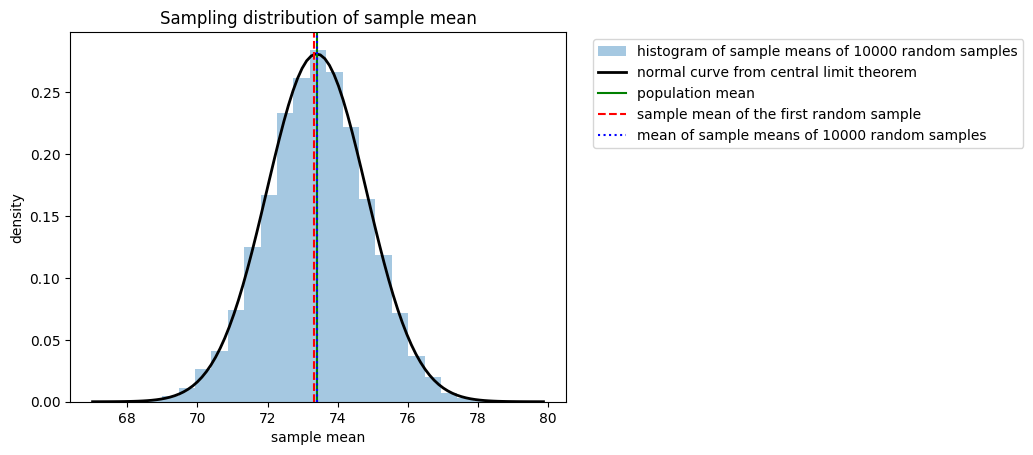

In [24]:
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=estimate1, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()